In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
df = pd.read_csv("AirPassengers.csv",parse_dates=['Month'], index_col='Month')

In [5]:
df.shape

(144, 1)

In [6]:
df.columns

Index(['No_Passengers'], dtype='object')

In [10]:
df.head()

,No_Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


C:\Users\rajar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


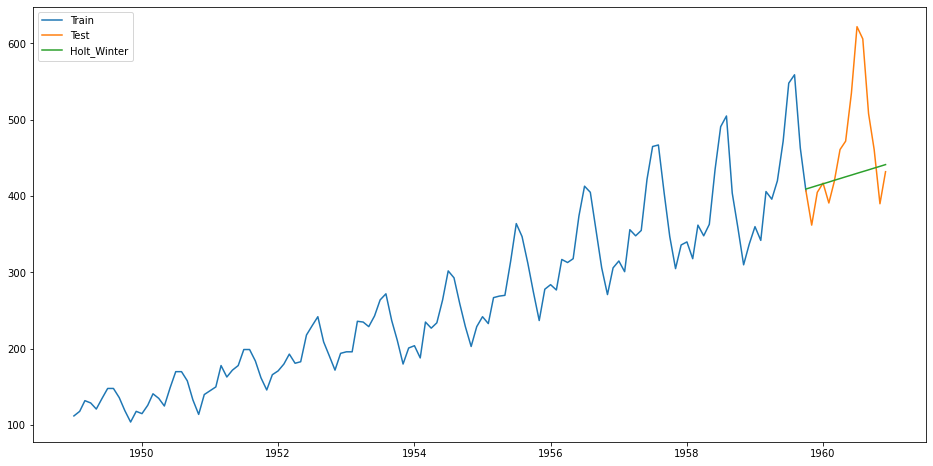

In [7]:
Train = df[:130]
Test = df[129:]

y_hat_avg = Test.copy()
fit1 = Holt(np.asarray(Train['No_Passengers'])).fit()
y_hat_avg['Holt_Winter'] = fit1.predict(start=130,end=144)
plt.figure(figsize=(16,8))
plt.plot(Train.index, Train['No_Passengers'], label='Train')
plt.plot(Test.index,Test['No_Passengers'], label='Test')
plt.plot(y_hat_avg.index,y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
# plt.savefig('Holt_Winters.jpg')

# Halt Winter's Exponential Smoothing

C:\Users\rajar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\rajar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


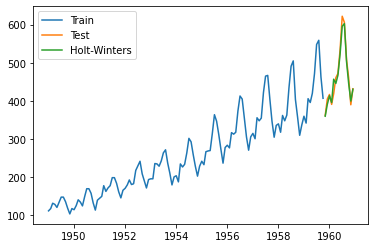

In [21]:
df.index.freq = 'MS' # Start of the month
train, test = df.iloc[:130, 0], df.iloc[130:, 0]

model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, damped=True)
hw_model = model.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred = hw_model.predict(start=test.index[0], end=test.index[-1])

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best');

C:\Users\rajar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\rajar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\rajar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


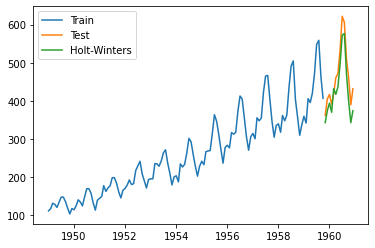

In [20]:
df.index.freq = 'MS'
train, test = df.iloc[:130, 0], df.iloc[130:, 0]
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')